# **IIoT Telemetry - Data Analysis, Preparation & Model Training**

**Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Following code is not necessary if the notebook runs as Jupyterlab on GCP Managed Notebooks*

In [ ]:
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

# **Load Data**


**[Option 1] Load Data from Google Cloud Storage**

In [7]:
# !gsutil cp gs://manufacturing-demo/telemetryfeat.csv .

Copying gs://manufacturing-demo/telemetryfeat.csv...
- [1 files][ 47.5 MiB/ 47.5 MiB]                                                
Operation completed over 1 objects/47.5 MiB.                                     


**[Option 2] Load Data from Github**

In [ ]:
# url = 'https://raw.githubusercontent.com/......csv'
# series_raw = pd.read_csv(url)
# series_raw.head()

**[Option 3] Load Data from BigQuery**

In [8]:
_IOT_PROJECT_NAME = u"lunar-demo"

def run_iot_query(query, index_col="datetime"):
  return pd.read_gbq(
    query,
    project_id=_IOT_PROJECT_NAME,
    index_col=index_col,
    dialect="standard").sort_index()

In [9]:
# 'telemetryfeat'
telemetryfeat_raw = run_iot_query(
    "SELECT * FROM `lunar-demo.manufacturing.telemetryfeat` order by datetime asc")

Downloading: 100%|██████████| 291300/291300 [00:34<00:00, 8525.98rows/s]


In [10]:
# Upload total 'raw' table data to BigQuery
# !pip install --quiet ipython-autotime pandas_gbq
# %load_ext autotime
# project_id = !gcloud config get-value project
# telemetryfeat.to_gbq('manufacturing.telemetryfeat2', project_id=project_id[0])

# **Display Raw Data**

**Copy and display 'raw' data**

In [18]:
telemetryfeat = telemetryfeat_raw
telemetryfeat.head(15)

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2015-01-02 05:00:00+00:00,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
2015-01-02 05:00:00+00:00,2,172.096089,442.804046,97.369279,41.970373,11.358840,41.038841,11.003220,4.569906
2015-01-02 05:00:00+00:00,3,170.066825,460.956803,101.395264,37.989643,12.133703,50.054464,10.831107,5.845904
2015-01-02 05:00:00+00:00,4,170.116871,440.333823,98.378607,42.106068,16.607902,49.172579,8.282528,4.833216
2015-01-02 05:00:00+00:00,5,175.674631,460.621226,97.928488,38.591031,14.915482,60.620670,10.824448,4.355144
2015-01-02 05:00:00+00:00,6,166.444305,463.516403,121.719376,38.635407,14.444338,52.712198,18.968190,5.609616
2015-01-02 05:00:00+00:00,7,173.004557,463.190750,102.947943,40.474100,16.414778,53.033936,6.719689,5.471629
2015-01-02 05:00:00+00:00,8,170.045926,457.909332,102.229773,39.978532,18.773000,56.230991,8.849344,6.263199
2015-01-02 05:00:00+00:00,9,179.657731,433.882827,99.757316,39.725985,20.075297,54.019108,9.184115,4.495655


We can filter data in two dimension: either all sensors for one machine, or data from one sensor on all machines. We will do both.

**Option 1: Choose one Sensor over all Machines**

('Unmelt' table for one feature only and list per Machine ID)

In [16]:
voltmean = telemetryfeat.reset_index()
voltmean = voltmean[['datetime', 'machineID', 'voltmean']]
voltmean = pd.pivot_table(voltmean, values='voltmean', index=['datetime'], columns=['machineID'])
voltmean = voltmean.dropna(axis='columns')
# Adding a prefix, since we cannot work with values starting with numbers in columns
voltmean = voltmean.add_prefix('m_')
voltmean

machineID,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,...,m_91,m_92,m_93,m_94,m_95,m_96,m_97,m_98,m_99,m_100
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-02 05:00:00+00:00,169.733809,172.096089,170.066825,170.116871,175.674631,166.444305,173.004557,170.045926,179.657731,169.200172,...,172.677564,170.560444,170.496339,165.811714,176.024427,174.305445,168.734298,168.697828,169.486659,170.666511
2015-01-02 08:00:00+00:00,170.525721,171.510408,167.193146,170.145327,174.725997,169.709845,173.815784,171.351848,177.537748,167.467301,...,173.245011,172.299821,171.713525,164.558632,175.915434,173.241995,170.815997,168.385422,170.506146,171.483121
2015-01-02 11:00:00+00:00,170.049722,170.840565,169.120617,168.985282,175.639031,169.141877,176.160444,170.441943,177.052348,167.100570,...,174.782505,169.155851,171.716567,163.036201,176.068521,172.957382,171.573747,169.312676,171.650582,171.841317
2015-01-02 14:00:00+00:00,170.341974,170.736634,170.667376,167.216339,174.371977,171.511405,175.918266,171.948016,175.673448,165.237155,...,174.624991,168.629099,173.169107,164.111694,173.884472,176.265383,170.503503,166.368306,170.513497,172.297964
2015-01-02 17:00:00+00:00,170.060643,169.596900,169.182447,169.106224,172.739565,172.086832,172.909641,171.217094,173.742675,164.453237,...,174.142999,168.597517,173.071985,166.142406,174.604635,174.889797,171.040214,165.636800,168.531441,170.167895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 17:00:00+00:00,171.349634,166.569083,171.111509,165.642642,172.957293,169.816262,169.478473,168.755389,167.470779,171.577454,...,170.149634,170.631841,169.466892,175.192990,182.025814,166.241646,175.867727,167.877142,173.232940,170.629076
2015-12-31 20:00:00+00:00,171.106776,166.899065,170.693967,166.787150,171.207999,171.112127,168.454482,170.036683,167.475402,170.817850,...,171.693158,171.362318,170.693073,174.986512,180.674445,165.127517,173.747255,166.294567,174.133704,168.690712
2015-12-31 23:00:00+00:00,168.463155,168.275282,172.179457,165.837692,170.342656,171.478221,166.080161,171.621181,164.433770,167.255451,...,167.886270,170.163492,172.034616,174.458304,179.271640,167.678923,172.083943,168.924428,172.421048,168.469994


**Option 2: Choose one Machine and show all Sensor Records on it**

In [14]:
machine_1 = telemetryfeat[(telemetryfeat.machineID == 1)]
# Normally we can drop the machine ID column, but we will need it for AutoML Forecasting,so we keep it 
# machine_1 = machine_1.drop(columns=['machineID']).sort_index(ascending=True)
machine_1

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2015-01-02 05:00:00+00:00,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
2015-01-02 08:00:00+00:00,1,170.525721,443.906847,97.667249,39.786670,12.591948,46.930282,9.406795,6.098173
2015-01-02 11:00:00+00:00,1,170.049722,446.461279,96.906162,40.016513,13.277336,42.836780,9.071472,5.481724
2015-01-02 14:00:00+00:00,1,170.341974,447.355315,96.229522,39.921963,13.817158,42.808633,8.256794,5.862312
2015-01-02 17:00:00+00:00,1,170.060643,452.163407,96.357441,39.990470,14.792869,42.525293,8.669605,5.907157
...,...,...,...,...,...,...,...,...,...
2015-12-31 17:00:00+00:00,1,171.349634,452.416132,99.748116,39.655997,14.236322,65.731722,8.891385,4.795727
2015-12-31 20:00:00+00:00,1,171.106776,448.747625,99.509456,39.416218,12.086360,66.209673,9.097349,5.535579
2015-12-31 23:00:00+00:00,1,168.463155,449.732664,98.636486,38.642038,12.447174,64.707424,10.294397,5.160023


# **Analyse Data**

**We have 8 sensor data from different machines per each time stamp. How many machines are there?**

In [19]:
telemetryfeat.machineID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
telemetryfeat['machineID'].nunique()

100

There are records from 100 machines.

**What is the time span? (until when do we have data?)**

In [21]:
telemetryfeat.tail()

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
datetime,,,,,,,,,
2016-01-01 05:00:00+00:00,96,168.737340,448.451423,102.010456,40.591368,17.863243,44.241511,10.602169,4.791980
2016-01-01 05:00:00+00:00,97,174.066698,462.606664,95.378736,40.668871,10.645043,47.928761,10.701270,5.131409
2016-01-01 05:00:00+00:00,98,170.146868,444.604801,125.024957,40.661580,17.398373,50.000901,9.436988,4.244810
2016-01-01 05:00:00+00:00,99,168.689830,457.549855,100.864715,40.882592,15.854221,45.155521,7.063937,5.008058
2016-01-01 05:00:00+00:00,100,173.872030,455.376558,101.447889,40.261609,15.564393,61.308632,8.835047,6.171566


We have data from 2015-01-02 until 2016-01-01.

**Are there any missing data?**

In [22]:
telemetryfeat.apply(lambda x: sum(x.isnull()),axis=0) 

machineID        0
voltmean         0
rotatemean       0
pressuremean     0
vibrationmean    0
voltsd           0
rotatesd         0
pressuresd       0
vibrationsd      0
dtype: int64

No missing data. Series is (atypically) very clean.

**How many records do we have?**

In [23]:
telemetryfeat.describe()

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.772380,446.613387,100.854549,40.384528,14.918992,49.947267,10.047051,5.001975
std,28.86612,4.716899,18.073481,4.733546,2.059801,2.260848,7.689803,1.712238,0.799431
min,1.00000,156.284729,267.008131,90.352636,35.253276,6.502826,19.839519,4.433238,2.107598
25%,25.75000,168.068540,441.572806,98.670051,39.357556,13.358201,44.667738,8.924565,4.461158
50%,50.50000,170.209615,449.198555,100.098070,40.070423,14.855999,49.614839,9.922168,4.958120
75%,75.25000,172.454059,456.369858,101.613625,40.832048,16.396254,54.802211,10.981186,5.484147
max,100.00000,220.569064,499.288786,152.660905,61.852838,27.914053,105.326445,28.867737,12.609035


We have 291,300 records for each feature. Given that we have 100 sensors this means we have 2,913 records per machine and sensor (feature). But let's extract the values from one sensor for all 100 machines to see that a bit more in detail:

**Do they values fluctuate a lot per machine, or are they similar?**

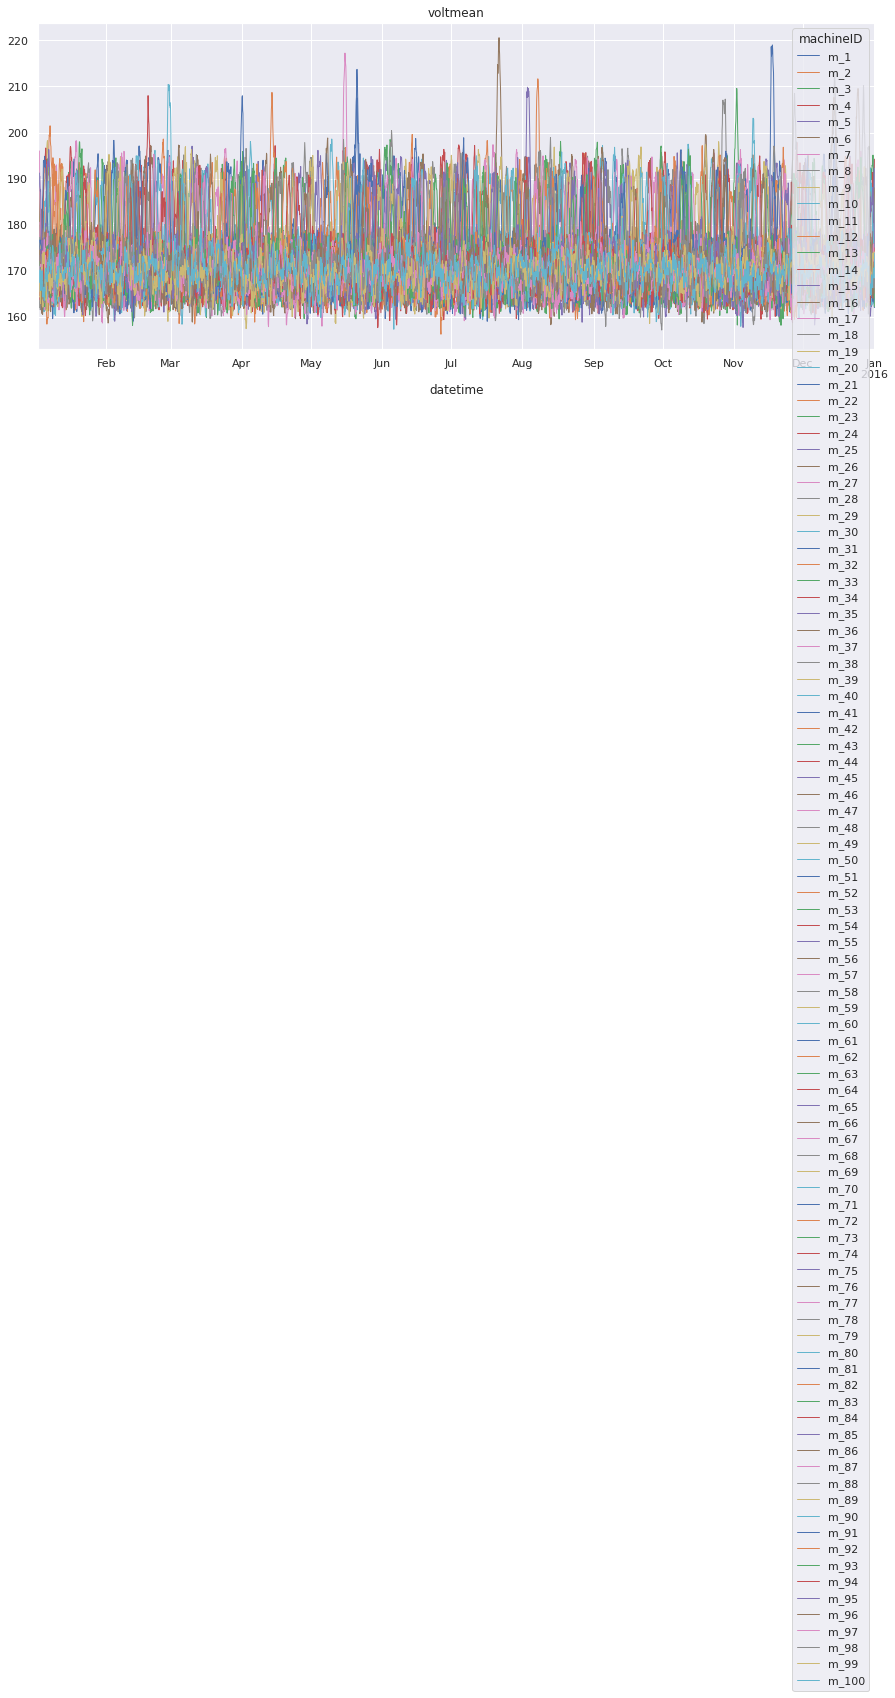

In [24]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.plot(linewidth=1.0,title='voltmean')

# **Analysis of Data from one Machine**

Let's have a look at rhe sensor records at a single machine (m_1 and m_100):

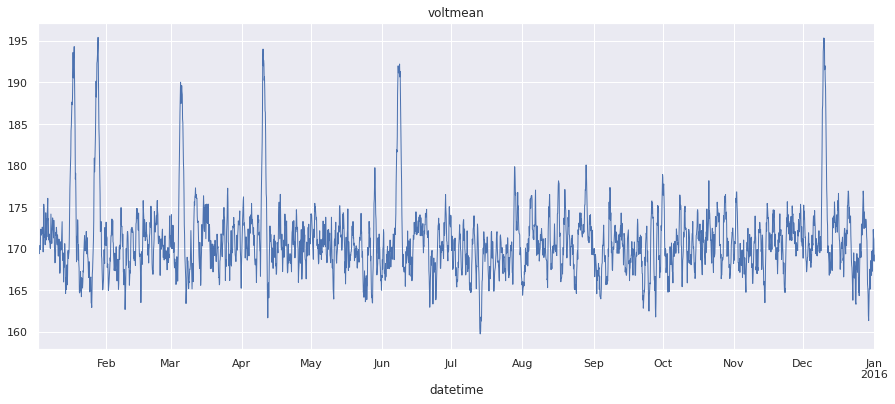

time: 959 ms


In [30]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.m_1.plot(linewidth=1.0,title='voltmean')

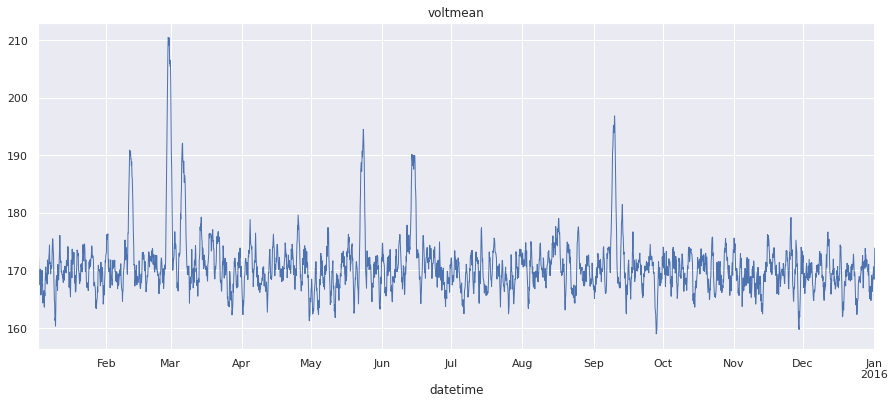

time: 922 ms


In [31]:
sns.set(rc={'figure.figsize':(15, 6)})
voltmean.m_100.plot(linewidth=1.0,title='voltmean')

Sensor values fluctuate a lot looking at different machines. Might be worthful knowing why.
That brings us to the next question regarding data distribution

**What is the data distribution over all 100 machines for one feature?**

Distribution for the one feature over all 100 machines:

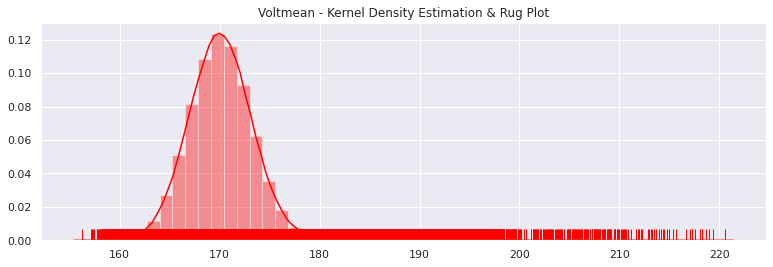

time: 3.09 s


In [32]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((voltmean), hist=True, rug=True, color ='red').set_title('Voltmean - Kernel Density Estimation & Rug Plot')
plt.show()

Distribution for the one feature for one machines (#1):

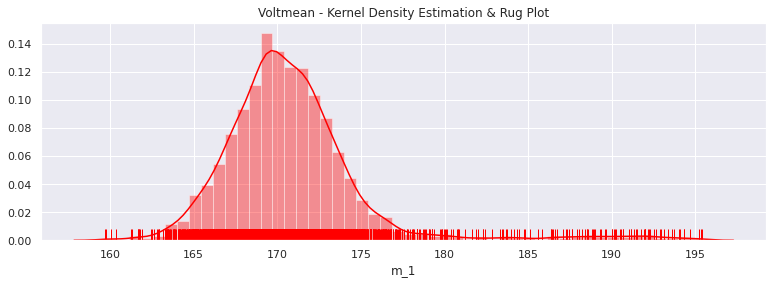

time: 413 ms


In [33]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((voltmean.m_1), hist=True, rug=True, color ='red').set_title('Voltmean - Kernel Density Estimation & Rug Plot')
plt.show()

In [39]:
%%bigquery
SELECT * 
FROM ML.WEIGHTS(MODEL banking.log_reg)

,processed_input,weight,category_weights
0,date,-4.194779e-10,[]
1,_TS_DOM_date_,NaN,"[{'category': '20', 'weight': -0.0812045965873..."
2,_TS_DOW_date_,NaN,"[{'category': '6', 'weight': -0.06844739360330..."
3,_TS_MOY_date_,NaN,"[{'category': '4', 'weight': 0.122374306104662..."
4,_TS_HOD_date_,NaN,"[{'category': '0', 'weight': 0.044565726085293..."
5,_TS_MOH_date_,NaN,"[{'category': '0', 'weight': 0.044565726085293..."
6,_TS_WOY_date_,NaN,"[{'category': '38', 'weight': 0.34825093586735..."
7,_TS_YEAR_date_,NaN,"[{'category': '2010', 'weight': 0.134299786137..."
8,google,-1.320949e-06,[]
9,apple,-4.336357e-05,[]


time: 1.01 s


**Autocorrelation Plot for selected feature on one machine**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


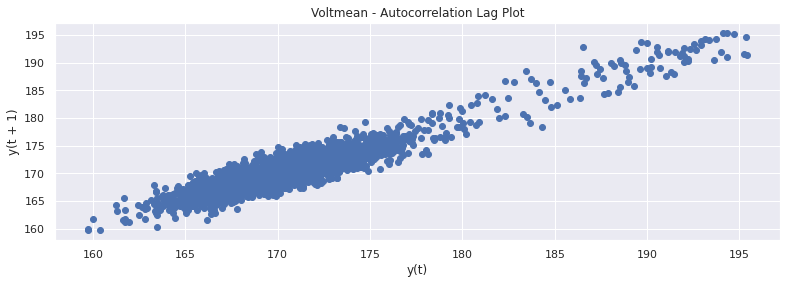

time: 292 ms


In [34]:
from pandas.plotting import lag_plot
lag_plot(voltmean.m_1)
plt.title('Voltmean - Autocorrelation Lag Plot')
plt.show()

Typically for time series: the most recent time steps has a strong influence on the current value.

Let's have a look at previous time steps' influence on the current value:

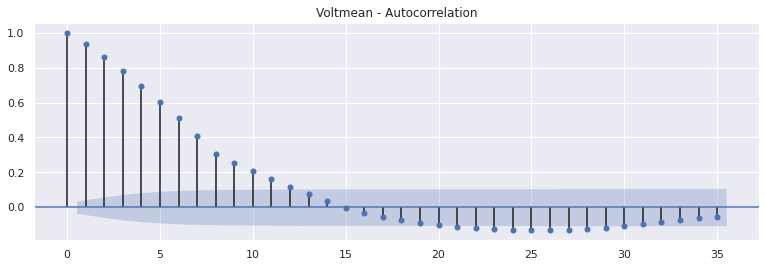

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(voltmean.m_1)
plt.title('Voltmean - Autocorrelation')
plt.show()

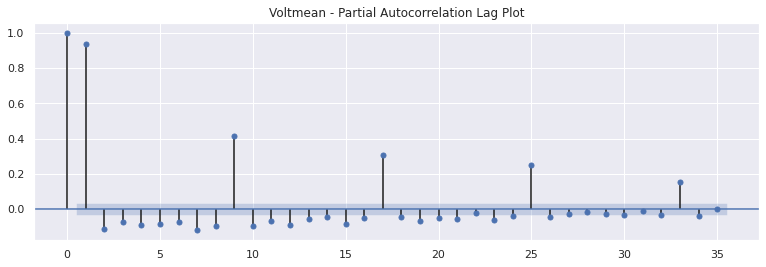

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(voltmean.m_1)
plt.title('Voltmean - Partial Autocorrelation Lag Plot')
plt.show()

There is an interesting pattern: every past 8 time steps (each 8 hours) have an influence on the current value. Domain knowledge might reveal the reason for this behavior, but 24h seems to reflect machine on/off cycles or similar.

**Visualize Sensor as Time Series Plot**

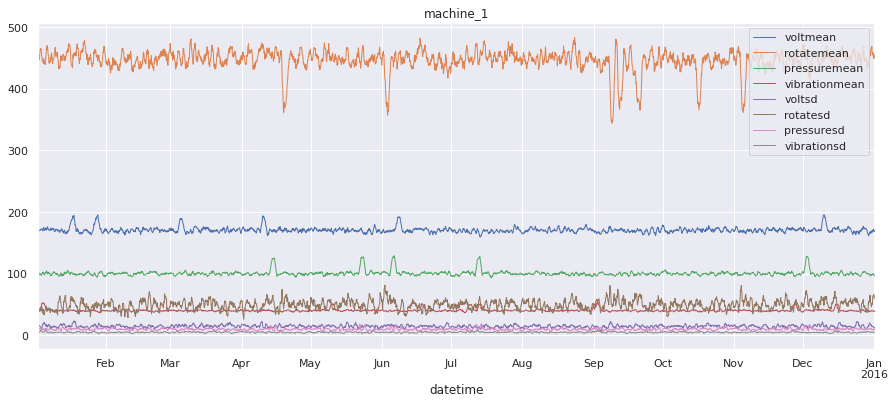

time: 1.18 s


In [21]:
# Remove machineID column
df = machine_1.drop(columns=['machineID', 'classifier'])
# Display all sensor data for machine 1
sns.set(rc={'figure.figsize':(15, 6)})
df.plot(linewidth=1.0,title='machine_1')

# **Preprocess Data for Model Training**

**Add Columns for BigQuery Classification and AutoML Forecasting**

In [ ]:
# AutoML Forecasting requires a constant per table, but witrh this dataset it is not necessary
# machine_1['unique_id'] = '42'
# machine_1.head()

**Add a classification component and classifier (for example we want to predict 'voltmean')**

In [ ]:
machine_1['delta'] = machine_1.voltmean.diff()
machine_1 = machine_1.dropna()
machine_1['classifier'] = machine_1['delta']
machine_1 = machine_1.drop(columns=['delta'])
machine_1['classifier'].values[machine_1['classifier'] < 0] = 0
machine_1['classifier'].values[machine_1['classifier'] > 0] = 1
machine_1.head()

# **Load Data to BigQuery**

We will be working with data from one machine.

In [ ]:
# Reset index to properly save datetime data in BigQuery
machine_1 = machine_1.reset_index()

In [ ]:
# Allow connection to BigQuery
!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

In [ ]:
# Upload filtered data to BigQuery
machine_1.to_gbq('manufacturing.machine_1', project_id=PROJECT)

# **Train & Evaluate Model**

## **Regression on BigQuery**

Let's create an Arima model for sensor 'voltmean' on machine 1

In [19]:
%%bigquery
CREATE MODEL `lunar-demo.manufacturing.arima`
 OPTIONS(MODEL_TYPE='ARIMA',
         time_series_timestamp_col='datetime',
         time_series_data_col='voltmean') AS
SELECT
  datetime,
  voltmean
FROM
  `manufacturing.machine_1`

""


time: 1min


In [22]:
%%bigquery
SELECT * 
FROM ML.ARIMA_COEFFICIENTS(MODEL manufacturing.arima)

,ar_coefficients,ma_coefficients,intercept_or_drift
0,[],"[0.05309046559396521, 0.022433609053060542, 0....",0.0


time: 845 ms


In [23]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL manufacturing.arima)

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,0,1,4,False,-4990.533516,9991.067033,1.801946,"[DAILY, WEEKLY]"
1,1,1,4,False,-4990.531578,9993.063157,1.801948,"[DAILY, WEEKLY]"
2,0,1,4,True,-4990.539367,9993.078734,1.801954,"[DAILY, WEEKLY]"
3,1,1,4,True,-4990.537288,9995.074577,1.801955,"[DAILY, WEEKLY]"
4,2,1,2,True,-4998.161499,10008.322999,1.810506,"[DAILY, WEEKLY]"
5,2,1,2,False,-5000.164370,10010.328740,1.814353,"[DAILY, WEEKLY]"
6,2,1,3,False,-4999.677546,10011.355093,1.813741,"[DAILY, WEEKLY]"
7,2,1,3,True,-5011.410037,10036.820074,1.827221,"[DAILY, WEEKLY]"
8,4,1,1,False,-5065.709887,10143.419774,1.899953,"[DAILY, WEEKLY]"
9,4,1,1,True,-5065.709642,10145.419283,1.899951,"[DAILY, WEEKLY]"


time: 1.08 s


In [24]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL manufacturing.arima)

,training_run,iteration,duration_ms
0,0,0,51538


time: 767 ms


## **Classification on BigQuery**

In [25]:
%%bigquery
CREATE OR REPLACE MODEL
  `manufacturing.log_reg`
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    input_label_cols=['classifier']
  ) AS
SELECT
  *
FROM
  `manufacturing.classification`

Executing query with job ID: 1866d79e-d0cc-4360-b417-ff958c22a4d3
Query executing: 0.19stime: 190 ms



ERROR:
 404 Not found: Table lunar-demo:manufacturing.classification was not found in location US

(job ID: 1866d79e-d0cc-4360-b417-ff958c22a4d3)

    -----Query Job SQL Follows-----     

    |    .    |    .    |    .    |
   1:CREATE OR REPLACE MODEL
   2:  `manufacturing.log_reg`
   3:OPTIONS
   4:  ( model_type='LOGISTIC_REG',
   5:    auto_class_weights=TRUE,
   6:    input_label_cols=['classifier']
   7:  ) AS
   8:SELECT
   9:  *
  10:FROM
  11:  `manufacturing.classification`
    |    .    |    .    |    .    |


In [ ]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.CONFUSION_MATRIX(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.ROC_CURVE(MODEL manufacturing.log_reg)

In [ ]:
%%bigquery
SELECT * 
FROM ML.WEIGHTS(MODEL manufacturing.log_reg)

## **Regression in AutoML**

In [ ]:
# Check that series contains more than 1,000 rows for AutoML
automl.count()